#From Classification to Clustering:- An End-to-End Machine Learning Project on the Iris Flower Dataset

---


- Classification - Logistic Regression, RF, K-NN, SVM-Linear
- Clustering - K-Means
- Dimensionality Reduction - PCA


Step 1: Load and Explore the Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels (0: setosa, 1: versicolor, 2: virginica)
feature_names = iris.feature_names
target_names = iris.target_names

In [ ]:
# Convert to DataFrame for EDA
df = pd.DataFrame(X, columns=feature_names)
df['species'] = target_names[y]

# Display basic info
print("First 5 rows:\n", df.head())

First 5 rows:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [ ]:
print("\nSummary statistics:\n", df.describe())


Summary statistics:
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [ ]:
print("\nClass distribution:\n", df['species'].value_counts())


Class distribution:
 species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


Step 2: Data Visualization

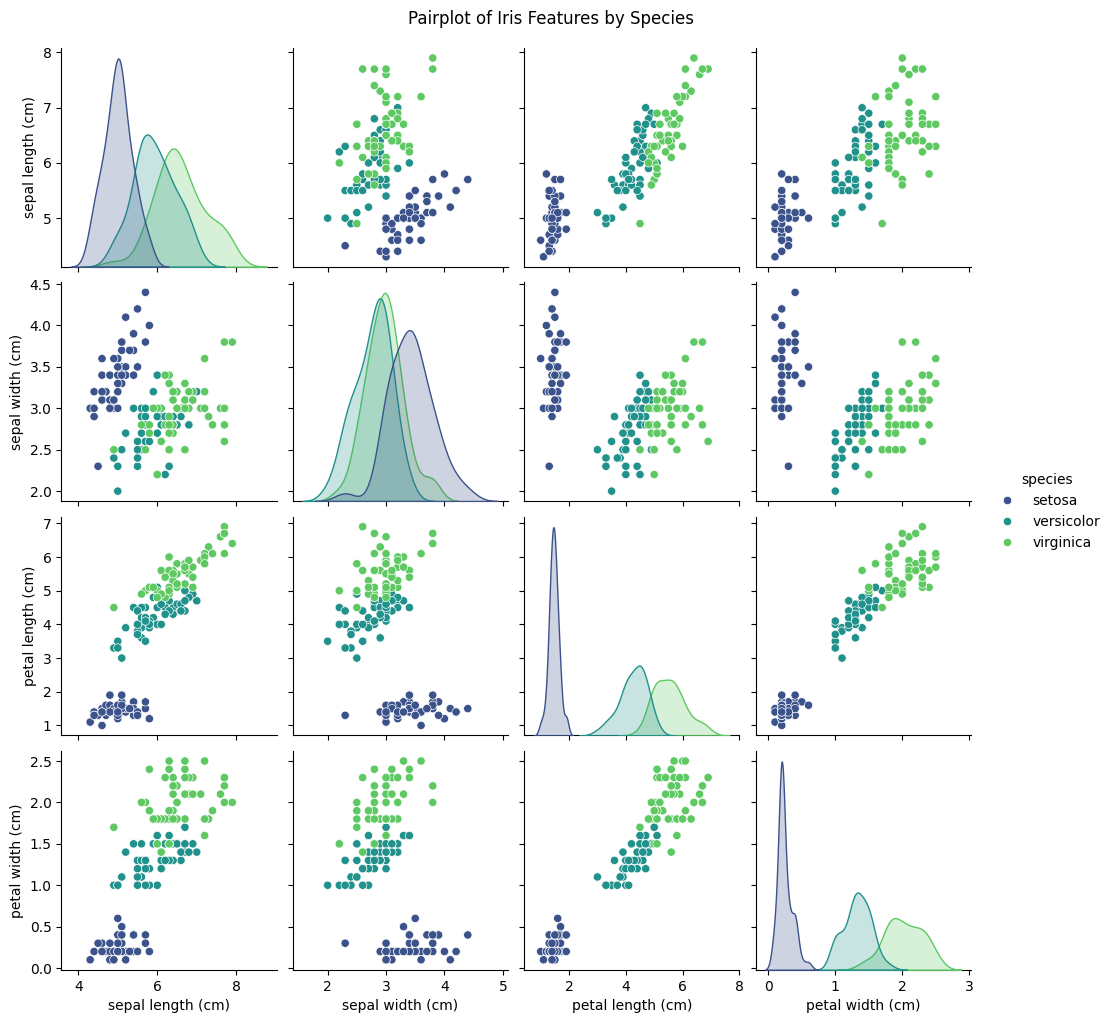

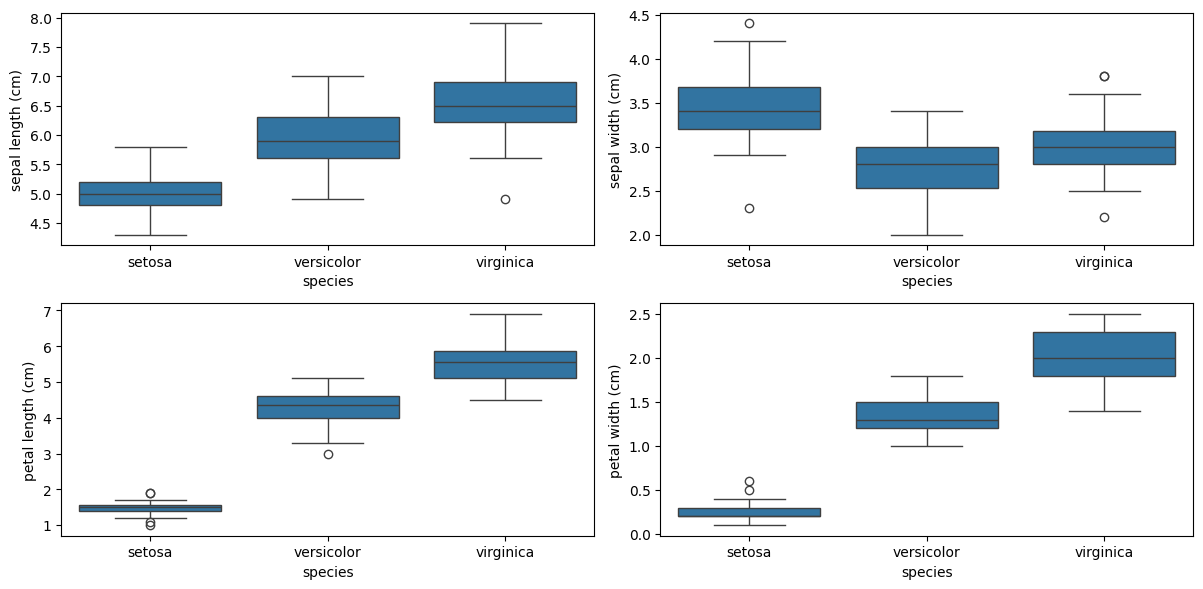

In [ ]:
# Pairplot to see feature relationships
sns.pairplot(df, hue='species', palette='viridis')
plt.suptitle("Pairplot of Iris Features by Species", y=1.02)
plt.show()

# Boxplots for each feature
plt.figure(figsize=(12, 6))
for i, feature in enumerate(feature_names):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='species', y=feature, data=df)
plt.tight_layout()
plt.show()

Step 3: Data Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (important for SVM, k-NN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Step 4: Classification Models


Logistic Regression Results:
Accuracy: 1.00
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



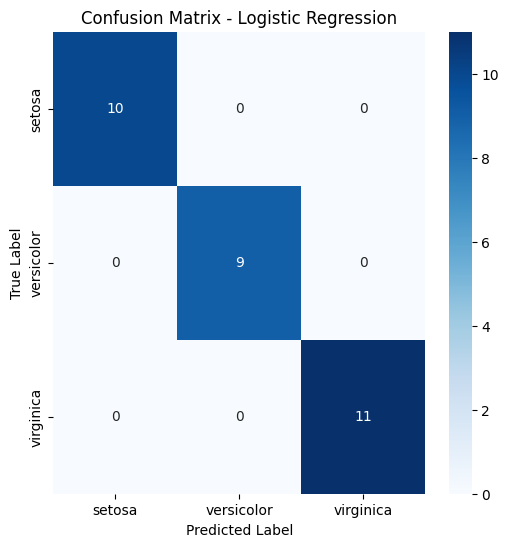


SVM Results:
Accuracy: 0.97
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



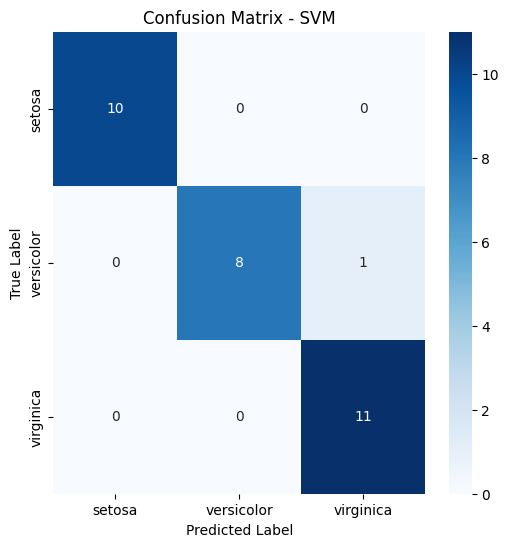


Random Forest Results:
Accuracy: 1.00
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



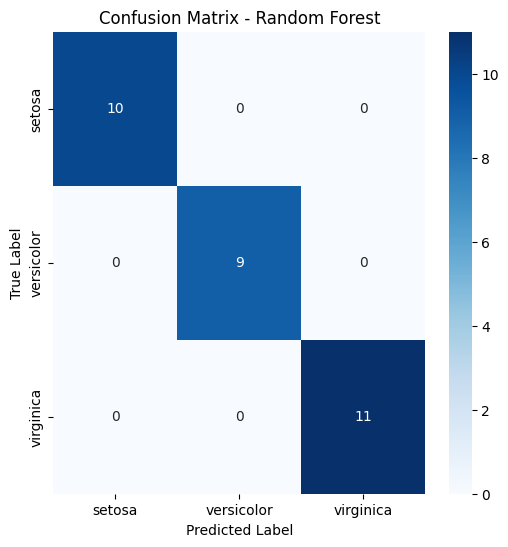


k-NN Results:
Accuracy: 1.00
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



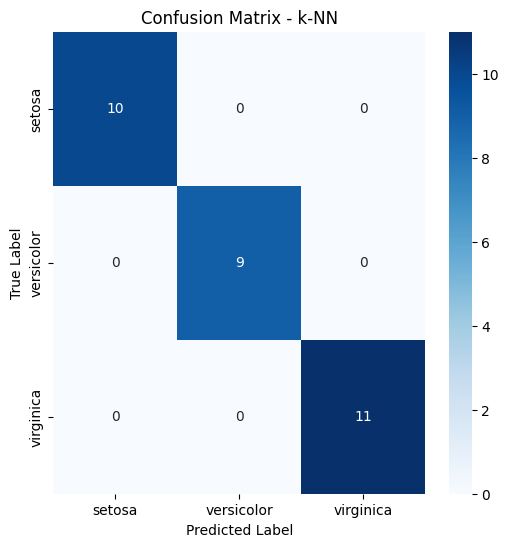


Model Accuracy Comparison:
                 Model  Accuracy
0  Logistic Regression  1.000000
2        Random Forest  1.000000
3                 k-NN  1.000000
1                  SVM  0.966667


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Assuming you have these defined elsewhere:
# X_train_scaled, X_test_scaled, y_train, y_test, target_names

models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "SVM": SVC(kernel='linear'),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "k-NN": KNeighborsClassifier(n_neighbors=3)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=target_names)
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {
        'accuracy': accuracy,
        'report': report,
        'confusion_matrix': cm
    }

    # Print results
    print(f"\n{name} Results:\nAccuracy: {accuracy:.2f}\n{report}")

    # Plot confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=target_names,
                yticklabels=target_names)
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Compare model accuracies
model_acc = {name: res['accuracy'] for name, res in results.items()}
accuracy_df = pd.DataFrame(model_acc.items(), columns=['Model', 'Accuracy']).sort_values('Accuracy', ascending=False)
print("\nModel Accuracy Comparison:")
print(accuracy_df)

Step 5: Clustering (K-Means)

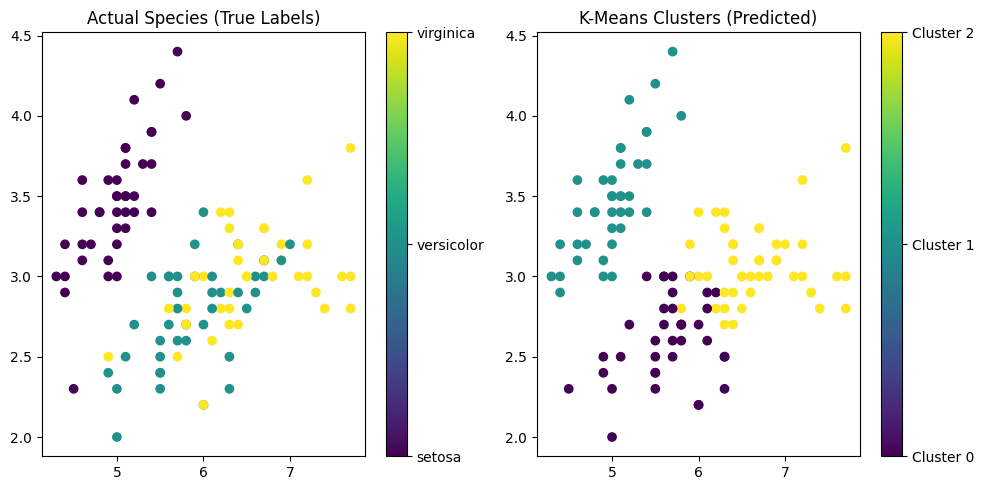

In [ ]:
from sklearn.cluster import KMeans

# Apply K-Means (unsupervised)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_train_scaled)

# Compare clusters with actual labels
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
scA = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')
plt.title("Actual Species (True Labels)")
cbar1 = plt.colorbar(scA, ticks=[0, 1, 2])
cbar1.ax.set_yticklabels(['setosa', 'versicolor', 'virginica'])  # Label colorbar

plt.subplot(1, 2, 2)
scK = plt.scatter(X_train[:, 0], X_train[:, 1], c=clusters, cmap='viridis')
plt.title("K-Means Clusters (Predicted)")
#plt.colorbar(ticks=[0, 1, 2], label='Species')
cbar2 = plt.colorbar(scK, ticks=[0, 1, 2])
cbar2.ax.set_yticklabels(['Cluster 0', 'Cluster 1', 'Cluster 2'])

plt.tight_layout()
plt.show()

Step 6: Dimensionality Reduction (PCA)

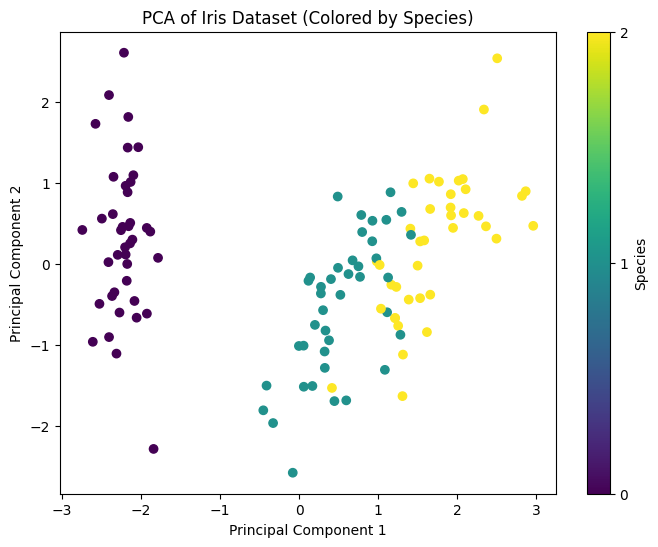

In [ ]:
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# Plot PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Iris Dataset (Colored by Species)")
plt.colorbar(ticks=[0, 1, 2], label='Species')
plt.show()